<a href="https://colab.research.google.com/github/Devverm/Unsupervised-ML---Netflix-Movies-and-TV-Shows-Clustering/blob/main/module_6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
data = pd.read_csv(r'/content/NETFLIX MOVIES AND TV SHOWS CLUSTERING.csv')

In [ ]:
data

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,TV Show,3%,NaN,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,"August 14, 2020",2020,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...
1,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,"December 23, 2016",2016,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,"December 20, 2018",2011,R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow..."
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,"November 16, 2017",2009,PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi..."
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,"January 1, 2020",2008,PG-13,123 min,Dramas,A brilliant group of students become card-coun...
...,...,...,...,...,...,...,...,...,...,...,...,...
7782,s7783,Movie,Zozo,Josef Fares,"Imad Creidi, Antoinette Turk, Elias Gergi, Car...","Sweden, Czech Republic, United Kingdom, Denmar...","October 19, 2020",2005,TV-MA,99 min,"Dramas, International Movies",When Lebanon's Civil War deprives Zozo of his ...
7783,s7784,Movie,Zubaan,Mozez Singh,"Vicky Kaushal, Sarah-Jane Dias, Raaghav Chanan...",India,"March 2, 2019",2015,TV-14,111 min,"Dramas, International Movies, Music & Musicals",A scrappy but poor boy worms his way into a ty...
7784,s7785,Movie,Zulu Man in Japan,NaN,Nasty C,NaN,"September 25, 2020",2019,TV-MA,44 min,"Documentaries, International Movies, Music & M...","In this documentary, South African rapper Nast..."
7785,s7786,TV Show,Zumbo's Just Desserts,NaN,"Adriano Zumbo, Rachel Khoo",Australia,"October 31, 2020",2019,TV-PG,1 Season,"International TV Shows, Reality TV",Dessert wizard Adriano Zumbo looks for the nex...


In [ ]:
data.shape

(7787, 12)

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7787 entries, 0 to 7786
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       7787 non-null   object
 1   type          7787 non-null   object
 2   title         7787 non-null   object
 3   director      5398 non-null   object
 4   cast          7069 non-null   object
 5   country       7280 non-null   object
 6   date_added    7777 non-null   object
 7   release_year  7787 non-null   int64 
 8   rating        7780 non-null   object
 9   duration      7787 non-null   object
 10  listed_in     7787 non-null   object
 11  description   7787 non-null   object
dtypes: int64(1), object(11)
memory usage: 730.2+ KB


In [ ]:
data.describe()

,release_year
count,7787.000000
mean,2013.932580
std,8.757395
min,1925.000000
25%,2013.000000
50%,2017.000000
75%,2018.000000
max,2021.000000


In [ ]:
data.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,TV Show,3%,NaN,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,"August 14, 2020",2020,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...
1,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,"December 23, 2016",2016,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,"December 20, 2018",2011,R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow..."
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,"November 16, 2017",2009,PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi..."
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,"January 1, 2020",2008,PG-13,123 min,Dramas,A brilliant group of students become card-coun...


In [ ]:
data.duplicated().sum()

np.int64(0)

In [ ]:
data.isnull().sum()

,0
show_id,0
type,0
title,0
director,2389
cast,718
country,507
date_added,10
release_year,0
rating,7
duration,0


In [ ]:
data['show_id'].isnull().sum()

np.int64(0)

In [ ]:
data['type'].isnull().sum()

np.int64(0)

In [ ]:
uqn_data = data['type'].unique()
uqn_data

array(['TV Show', 'Movie'], dtype=object)

In [ ]:
data['title'].isnull().sum()

np.int64(0)

In [ ]:
data['director'].isnull().sum()

np.int64(2389)

In [ ]:
data

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,TV Show,3%,NaN,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,"August 14, 2020",2020,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...
1,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,"December 23, 2016",2016,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,"December 20, 2018",2011,R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow..."
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,"November 16, 2017",2009,PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi..."
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,"January 1, 2020",2008,PG-13,123 min,Dramas,A brilliant group of students become card-coun...
...,...,...,...,...,...,...,...,...,...,...,...,...
7782,s7783,Movie,Zozo,Josef Fares,"Imad Creidi, Antoinette Turk, Elias Gergi, Car...","Sweden, Czech Republic, United Kingdom, Denmar...","October 19, 2020",2005,TV-MA,99 min,"Dramas, International Movies",When Lebanon's Civil War deprives Zozo of his ...
7783,s7784,Movie,Zubaan,Mozez Singh,"Vicky Kaushal, Sarah-Jane Dias, Raaghav Chanan...",India,"March 2, 2019",2015,TV-14,111 min,"Dramas, International Movies, Music & Musicals",A scrappy but poor boy worms his way into a ty...
7784,s7785,Movie,Zulu Man in Japan,NaN,Nasty C,NaN,"September 25, 2020",2019,TV-MA,44 min,"Documentaries, International Movies, Music & M...","In this documentary, South African rapper Nast..."
7785,s7786,TV Show,Zumbo's Just Desserts,NaN,"Adriano Zumbo, Rachel Khoo",Australia,"October 31, 2020",2019,TV-PG,1 Season,"International TV Shows, Reality TV",Dessert wizard Adriano Zumbo looks for the nex...


In [ ]:
data['director'] = data['director'].fillna('Unknown')

In [ ]:
data['director']

,director
0,Unknown
1,Jorge Michel Grau
2,Gilbert Chan
3,Shane Acker
4,Robert Luketic
...,...
7782,Josef Fares
7783,Mozez Singh
7784,Unknown
7785,Unknown


In [ ]:
data['director'].isnull().sum()

np.int64(0)

In [ ]:
data['cast'].isnull().sum()

np.int64(718)

In [ ]:
data['cast'] = data['cast'].fillna('Unknown')

In [ ]:
data['cast']

,cast
0,"João Miguel, Bianca Comparato, Michel Gomes, R..."
1,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ..."
2,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ..."
3,"Elijah Wood, John C. Reilly, Jennifer Connelly..."
4,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar..."
...,...
7782,"Imad Creidi, Antoinette Turk, Elias Gergi, Car..."
7783,"Vicky Kaushal, Sarah-Jane Dias, Raaghav Chanan..."
7784,Nasty C
7785,"Adriano Zumbo, Rachel Khoo"


In [ ]:
data['cast'].isnull().sum()

np.int64(0)

In [ ]:
data['country'].isnull().sum()

np.int64(507)

In [ ]:
data['country'] = data['country'].fillna('Unknown')

In [ ]:
data['country']

,country
0,Brazil
1,Mexico
2,Singapore
3,United States
4,United States
...,...
7782,"Sweden, Czech Republic, United Kingdom, Denmar..."
7783,India
7784,Unknown
7785,Australia


In [ ]:
data['country'].isnull().sum()

np.int64(0)

In [ ]:
data['date_added'].isnull().sum()

np.int64(10)

In [ ]:
data.rename(columns={'date_added':'release_date'}, inplace=True)

In [ ]:
data['release_date'] = data['release_date'].fillna('Unknown')

In [ ]:
data['release_date'].isnull().sum()

np.int64(0)

In [ ]:
data['release_date']

,release_date
0,"August 14, 2020"
1,"December 23, 2016"
2,"December 20, 2018"
3,"November 16, 2017"
4,"January 1, 2020"
...,...
7782,"October 19, 2020"
7783,"March 2, 2019"
7784,"September 25, 2020"
7785,"October 31, 2020"


In [ ]:
data = data.drop(['release_year'], axis=1)

In [ ]:
data

,show_id,type,title,director,cast,country,release_date,rating,duration,listed_in,description
0,s1,TV Show,3%,Unknown,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,"August 14, 2020",TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...
1,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,"December 23, 2016",TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,"December 20, 2018",R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow..."
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,"November 16, 2017",PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi..."
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,"January 1, 2020",PG-13,123 min,Dramas,A brilliant group of students become card-coun...
...,...,...,...,...,...,...,...,...,...,...,...
7782,s7783,Movie,Zozo,Josef Fares,"Imad Creidi, Antoinette Turk, Elias Gergi, Car...","Sweden, Czech Republic, United Kingdom, Denmar...","October 19, 2020",TV-MA,99 min,"Dramas, International Movies",When Lebanon's Civil War deprives Zozo of his ...
7783,s7784,Movie,Zubaan,Mozez Singh,"Vicky Kaushal, Sarah-Jane Dias, Raaghav Chanan...",India,"March 2, 2019",TV-14,111 min,"Dramas, International Movies, Music & Musicals",A scrappy but poor boy worms his way into a ty...
7784,s7785,Movie,Zulu Man in Japan,Unknown,Nasty C,Unknown,"September 25, 2020",TV-MA,44 min,"Documentaries, International Movies, Music & M...","In this documentary, South African rapper Nast..."
7785,s7786,TV Show,Zumbo's Just Desserts,Unknown,"Adriano Zumbo, Rachel Khoo",Australia,"October 31, 2020",TV-PG,1 Season,"International TV Shows, Reality TV",Dessert wizard Adriano Zumbo looks for the nex...


In [ ]:
data['rating'].isnull().sum()

np.int64(7)

In [ ]:
un_data = data['rating'].unique()
un_data

array(['TV-MA', 'R', 'PG-13', 'TV-14', 'TV-PG', 'NR', 'TV-G', 'TV-Y', nan,
       'TV-Y7', 'PG', 'G', 'NC-17', 'TV-Y7-FV', 'UR'], dtype=object)

In [ ]:
data['rating'] = data['rating'].fillna('unknow')

In [ ]:
data['rating']

,rating
0,TV-MA
1,TV-MA
2,R
3,PG-13
4,PG-13
...,...
7782,TV-MA
7783,TV-14
7784,TV-MA
7785,TV-PG


In [ ]:
data['rating'].isnull().sum()

np.int64(0)

In [ ]:
data.rename(columns={'listed_in':'genre'}, inplace=True)

In [ ]:
data['genre'].isnull().sum()

np.int64(0)

In [ ]:
data['genre']

,genre
0,"International TV Shows, TV Dramas, TV Sci-Fi &..."
1,"Dramas, International Movies"
2,"Horror Movies, International Movies"
3,"Action & Adventure, Independent Movies, Sci-Fi..."
4,Dramas
...,...
7782,"Dramas, International Movies"
7783,"Dramas, International Movies, Music & Musicals"
7784,"Documentaries, International Movies, Music & M..."
7785,"International TV Shows, Reality TV"


In [ ]:
data['description'].isnull().sum()

np.int64(0)

In [ ]:
print(data.groupby('type')['duration'].agg(['unique', 'nunique']).head())

                                                    unique  nunique
type                                                               
Movie    [93 min, 78 min, 80 min, 123 min, 95 min, 119 ...      201
TV Show  [4 Seasons, 1 Season, 2 Seasons, 3 Seasons, 5 ...       15


In [ ]:
data['duration_value'] = data['duration'].str.extract(r'(\d+)', expand=False).astype(float)

def categorize_duration(row):
    if row['type'] == 'Movie':
        if pd.isna(row['duration_value']): return 'Unknown'
        if row['duration']: return 'Movie'
    elif row['type'] == 'TV Show':
        if pd.isna(row['duration_value']): return 'Unknown'
        if row['duration']: return 'TV Show'

In [ ]:
data.columns

Index(['show_id', 'type', 'title', 'director', 'cast', 'country',
       'release_date', 'rating', 'duration', 'genre', 'description',
       'duration_value'],
      dtype='object')

In [ ]:
data['duration_value']

,duration_value
0,4.0
1,93.0
2,78.0
3,80.0
4,123.0
...,...
7782,99.0
7783,111.0
7784,44.0
7785,1.0


In [ ]:
data['duration_value'].isnull().sum()

np.int64(0)

In [ ]:
data['title'].head(20)

,title
0,3%
1,7:19
2,23:59
3,9
4,21
5,46
6,122
7,187
8,706
9,1920


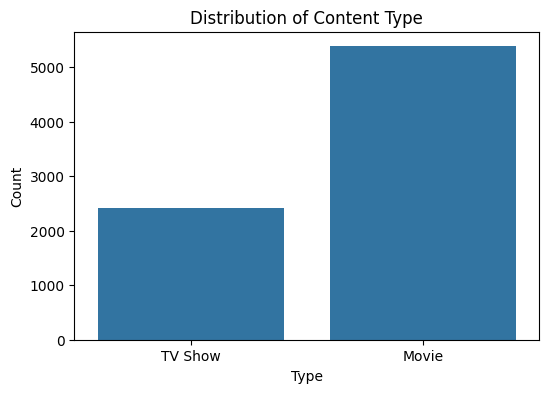

In [ ]:
plt.figure(figsize=(6,4))
sns.countplot(data=data, x="type")
plt.title("Distribution of Content Type")
plt.xlabel("Type")
plt.ylabel("Count")
plt.show()


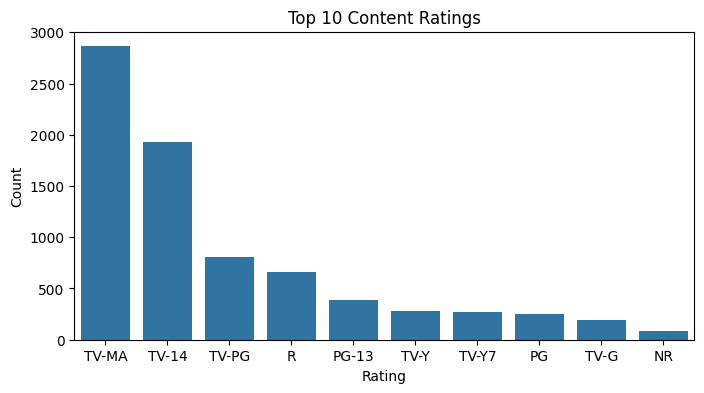

In [ ]:
top_ratings = data['rating'].value_counts().head(10).index

plt.figure(figsize=(8,4))
sns.countplot(data=data, x="rating", order=top_ratings)
plt.title("Top 10 Content Ratings")
plt.xlabel("Rating")
plt.ylabel("Count")
plt.show()


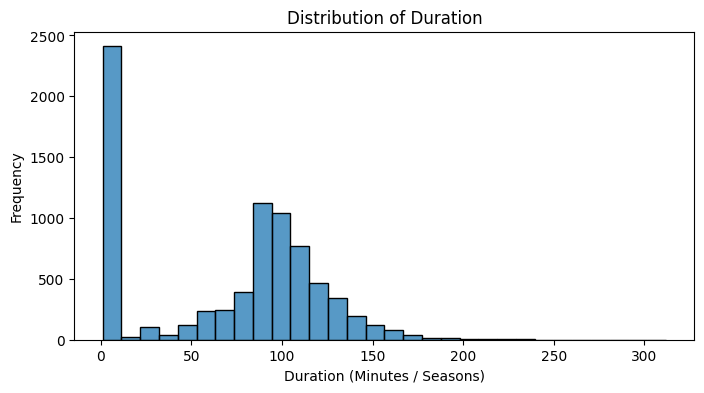

In [ ]:
plt.figure(figsize=(8,4))
sns.histplot(data['duration_value'].dropna(), bins=30)
plt.title("Distribution of Duration")
plt.xlabel("Duration (Minutes / Seasons)")
plt.ylabel("Frequency")
plt.show()


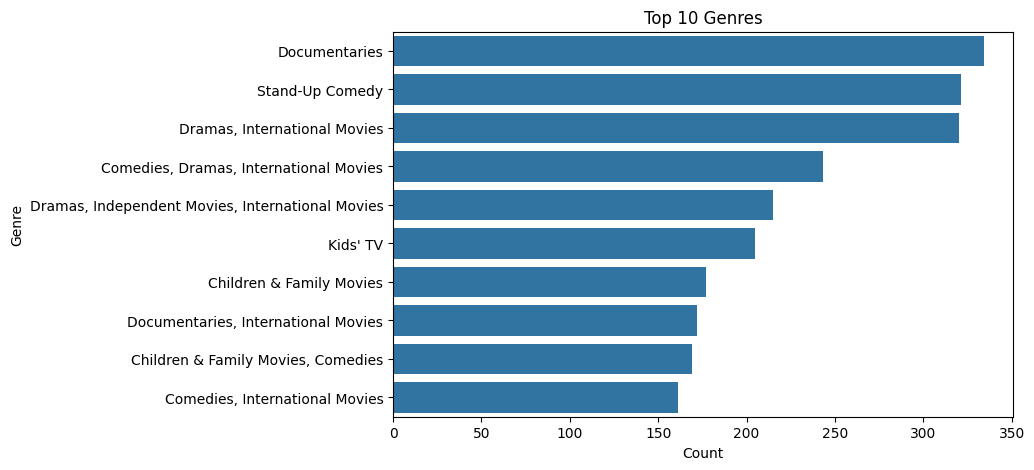

In [ ]:
top_genres = data['genre'].value_counts().head(10)

plt.figure(figsize=(8,5))
sns.barplot(x=top_genres.values, y=top_genres.index)
plt.title("Top 10 Genres")
plt.xlabel("Count")
plt.ylabel("Genre")
plt.show()


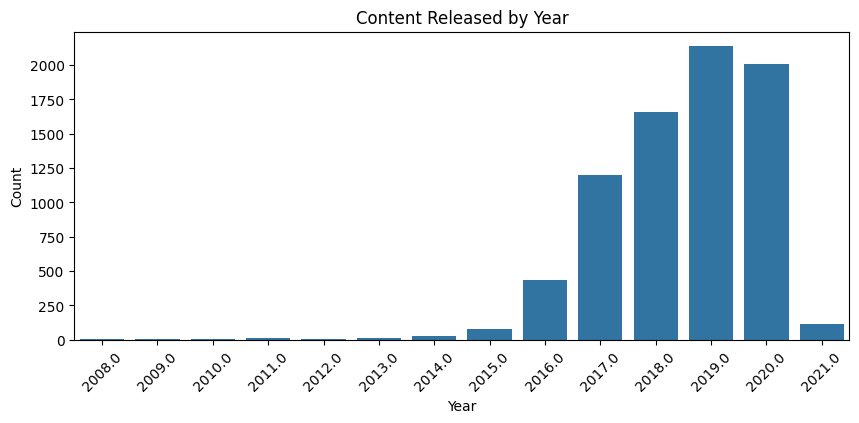

In [ ]:
data['release_year'] = pd.to_datetime(data['release_date'], errors='coerce').dt.year

plt.figure(figsize=(10,4))
sns.countplot(
    data=data,
    x="release_year",
    order=sorted(data['release_year'].dropna().unique())
)
plt.title("Content Released by Year")
plt.xlabel("Year")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.show()


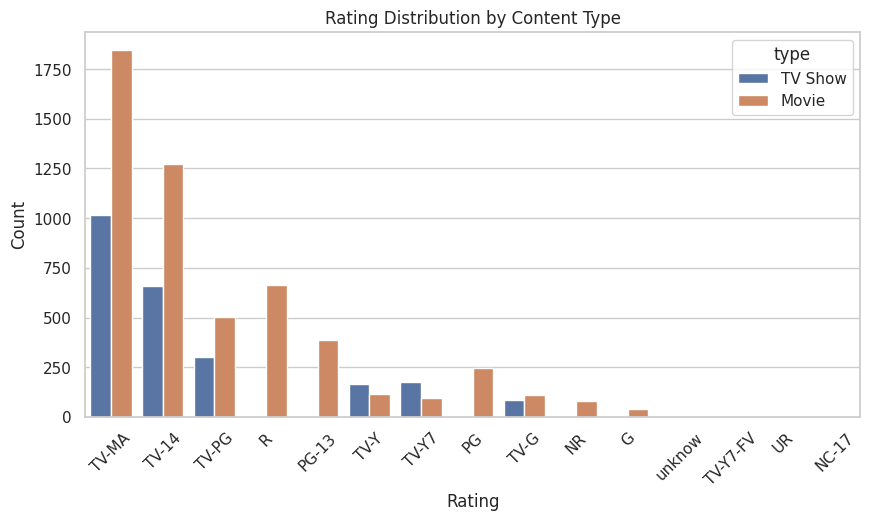

In [ ]:
plt.figure(figsize=(10,5))
sns.countplot(data=data, x="rating", hue="type",
              order=data['rating'].value_counts().index)
plt.title("Rating Distribution by Content Type")
plt.xlabel("Rating")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.show()


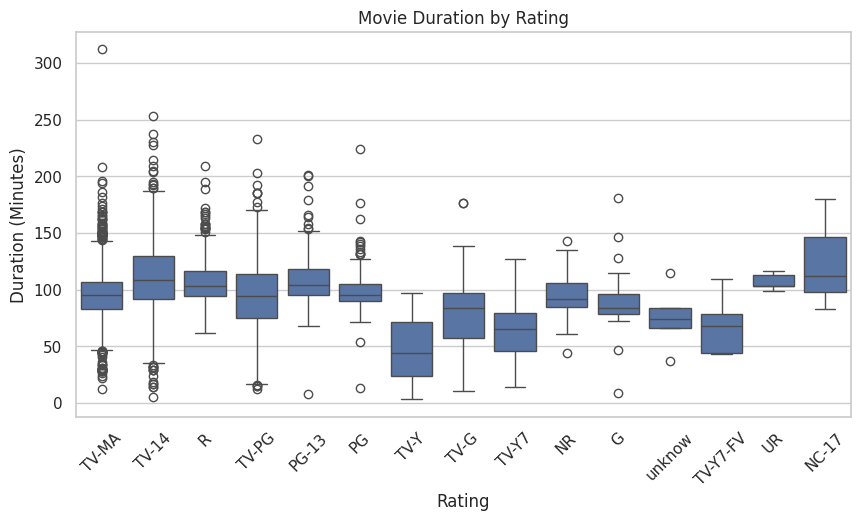

In [ ]:
movies = data[data['type'] == 'Movie']

plt.figure(figsize=(10,5))
sns.boxplot(data=movies, x="rating", y="duration_value",
            order=movies['rating'].value_counts().index)
plt.title("Movie Duration by Rating")
plt.xlabel("Rating")
plt.ylabel("Duration (Minutes)")
plt.xticks(rotation=45)
plt.show()


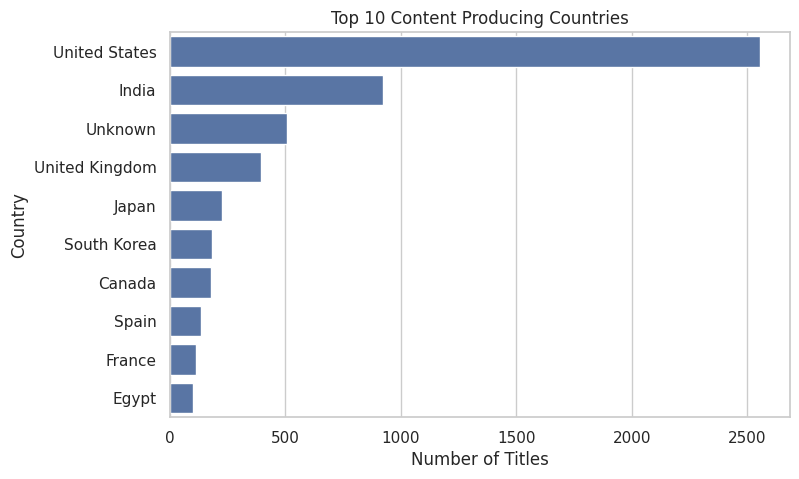

In [ ]:
top_countries = data['country'].value_counts().head(10)

plt.figure(figsize=(8,5))
sns.barplot(x=top_countries.values, y=top_countries.index)
plt.title("Top 10 Content Producing Countries")
plt.xlabel("Number of Titles")
plt.ylabel("Country")
plt.show()


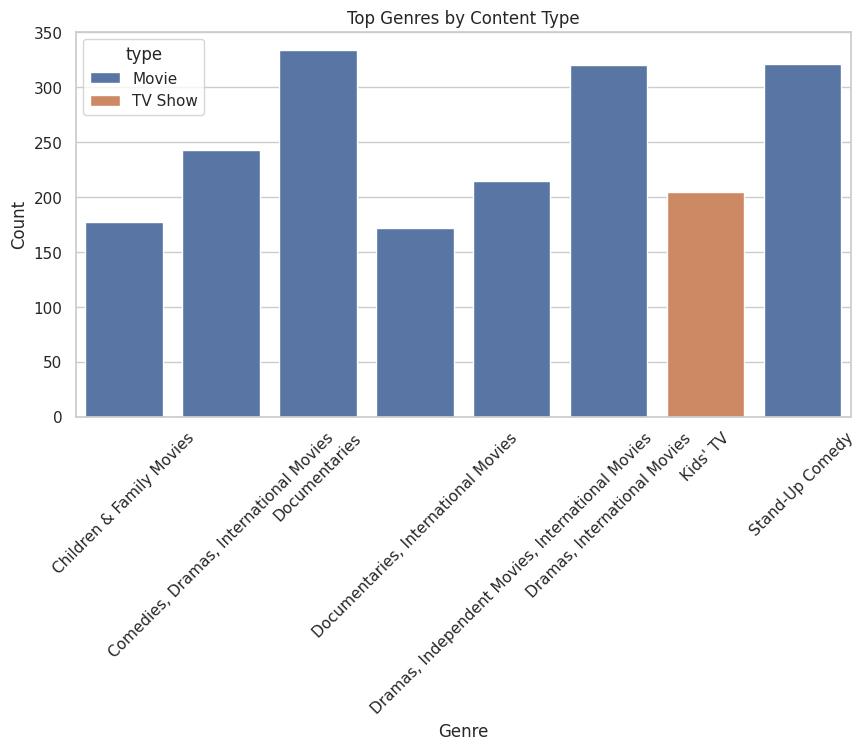

In [ ]:
genre_type = data.groupby(['genre', 'type']).size().reset_index(name='count')
top_genres = genre_type.groupby('genre')['count'].sum().nlargest(8).index
genre_type = genre_type[genre_type['genre'].isin(top_genres)]

plt.figure(figsize=(10,5))
sns.barplot(data=genre_type, x="genre", y="count", hue="type")
plt.title("Top Genres by Content Type")
plt.xlabel("Genre")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.show()


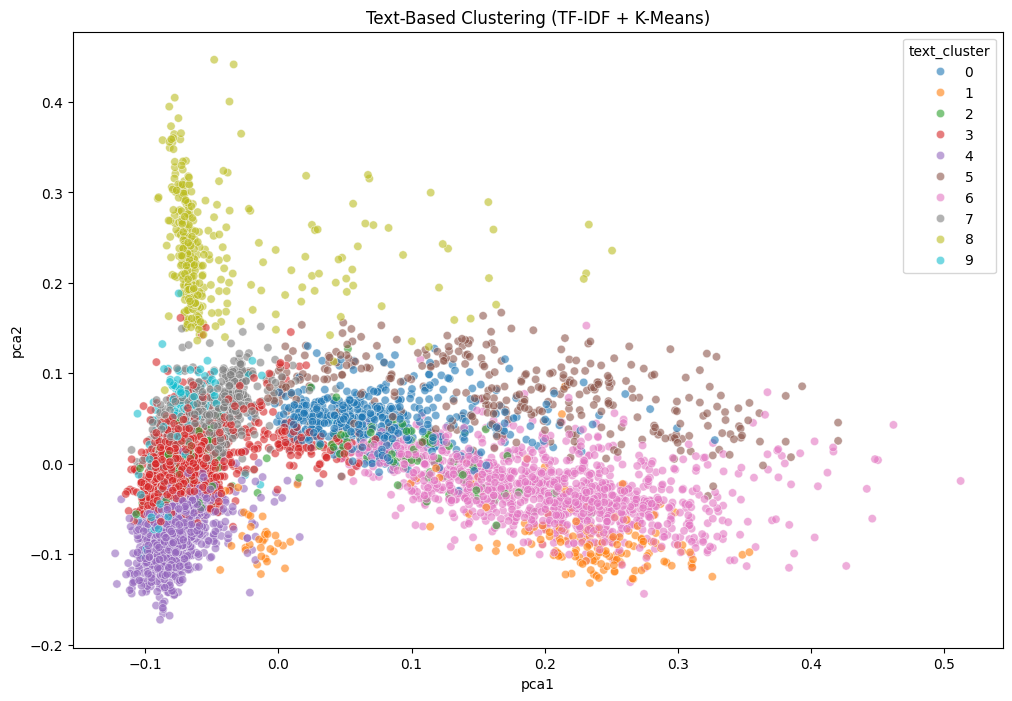

Cluster 0 Keywords: tv, kids, unknown, reality, friends, series, comedies, adventures, world, fun
Cluster 1 Keywords: kim, tv, shows, lee, korean, jung, park, jin, min, hyun
Cluster 2 Keywords: sci, fi, fantasy, action, adventure, tv, movies, michael, unknown, david
Cluster 3 Keywords: movies, family, comedies, children, dramas, michael, john, adventure, action, david
Cluster 4 Keywords: movies, international, dramas, comedies, romantic, independent, man, young, khan, woman
Cluster 5 Keywords: docuseries, unknown, tv, shows, nature, science, crime, series, british, world
Cluster 6 Keywords: tv, shows, unknown, international, crime, dramas, romantic, series, reality, comedies
Cluster 7 Keywords: documentaries, documentary, unknown, movies, sports, international, world, life, film, explores
Cluster 8 Keywords: stand, comedy, comedian, special, comic, talk, stage, takes, jay, shows
Cluster 9 Keywords: music, musicals, documentaries, movies, international, band, comedies, documentary, khan

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA, TruncatedSVD

# 1. Load the dataset
df = pd.read_csv('/content/cleaned_data.csv')

# 2. Text Preprocessing
# Combine relevant text features into a single metadata string
text_cols = ['description', 'genre', 'director', 'cast']
for col in text_cols:
    df[col] = df[col].fillna('')

df['combined_text'] = df['description'] + " " + df['genre'] + " " + df['director'] + " " + df['cast']

# 3. Vectorization (TF-IDF)
# Convert text to a matrix of TF-IDF features, removing common English stop words
tfidf = TfidfVectorizer(stop_words='english', max_features=5000)
tfidf_matrix = tfidf.fit_transform(df['combined_text'])

# 4. K-Means Clustering
# We choose 10 clusters to capture different broad themes (Comedy, Anime, International, etc.)
num_clusters = 10
kmeans = KMeans(n_clusters=num_clusters, random_state=42, n_init=10)
df['text_cluster'] = kmeans.fit_predict(tfidf_matrix)

# 5. Dimensionality Reduction for Visualization
# TF-IDF creates thousands of dimensions. We use TruncatedSVD followed by PCA
# to project the data into 2D space for plotting.
svd = TruncatedSVD(n_components=50, random_state=42)
X_reduced = svd.fit_transform(tfidf_matrix)

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_reduced)
df['pca1'] = X_pca[:, 0]
df['pca2'] = X_pca[:, 1]

# 6. Plot the Clusters
plt.figure(figsize=(12, 8))
sns.scatterplot(x='pca1', y='pca2', hue='text_cluster', data=df, palette='tab10', alpha=0.6)
plt.title('Text-Based Clustering (TF-IDF + K-Means)')
plt.show()

# 7. Analyze Clusters (Extracting Top Keywords)
def get_top_keywords(cluster_id, tfidf, matrix, n_terms=10):
    indices = df[df['text_cluster'] == cluster_id].index
    # Calculate the mean TF-IDF weight for each word in this cluster
    mean_weights = matrix[indices].mean(axis=0).A1
    sorted_indices = mean_weights.argsort()[::-1]
    feature_names = tfidf.get_feature_names_out()
    return [feature_names[i] for i in sorted_indices[:n_terms]]

for i in range(num_clusters):
    keywords = get_top_keywords(i, tfidf, tfidf_matrix)
    print(f"Cluster {i} Keywords: {', '.join(keywords)}")

# 8. Export Results
df.to_csv('text_clustered_results.csv', index=False)